# Data Loading and Initial Analysis
Load dataset and perform exploratory data analysis including checking data types, missing values, distributions, and correlations between features.

In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import re

In [128]:
# Load the dataset
file_path = 'D:/MlopsHack/MLOps_Hacakthon/data/MLOps_Acadimic__DataSET.csv'
data = pd.read_csv(file_path)


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SchoolDepartment       2138 non-null   object 
 1   ProjectTitle           2137 non-null   object 
 2   Finish Time            0 non-null      float64
 3   Email                  2139 non-null   object 
 4   RequiredSkill          2052 non-null   object 
 5   Professors             2133 non-null   object 
 6   GainedSkill            2018 non-null   object 
 7   strartingOrAsgnmtDate  2139 non-null   object 
 8   Hour                   2139 non-null   object 
dtypes: float64(1), object(8)
memory usage: 150.5+ KB


In [130]:
# Display the first few rows of the dataset
data.sample(5)

,SchoolDepartment,ProjectTitle,Finish Time,Email,RequiredSkill,Professors,GainedSkill,strartingOrAsgnmtDate,Hour
1583,Partnerships and External Collabor,"Discount tickets to professional bull riders, ...",NaN,dwetherheadb@livejournal.com,Internal and External Communication,Samira Alaoui,"Proofreading and Quality Assurance, Website Pr...",2019-01-31,05:48:00 PM
177,Tech Communication and Media,New Social Media Scheduling Tool,NaN,kfoulstone0@instagram.com,NaN,Fatima Zahra El Idrissi,Social Media Strategy,27-11-2019,17:16:00
2086,Academic Affairs & Staff Development,Automated online Lenel badge scheduler components,NaN,dwetherheadb@livejournal.com,"Website Programming, Data Collection Tools",Samira Alaoui,"Data Collection Tools, Website Programming",2020-10-23,04:05:00
1036,Social Impact Engin,Medicare and COVID-19 Webinar,NaN,rstillgoe7@seesaa.net,"Strategic Planning and Project Management, New...",Mohammed Fassi,"Public Outreach and Engagement, Social Media S...",11-06-2020,19:05:00
1467,Financal Engineering,2019 Budget cover,NaN,dwetherheadb@livejournal.com,"Graphic Design/Marketing (Posters, Brochures, ...",Samira Alaoui,"Graphic Design, Technical Documentation",02-08-2018,06:08:00 PM


In [131]:
data.rename(columns={'ProjectTitle': 'CourseTitle'}, inplace=True)

In [132]:
# Check the data types of each column
data.dtypes

SchoolDepartment          object
CourseTitle               object
Finish Time              float64
Email                     object
RequiredSkill             object
Professors                object
GainedSkill               object
strartingOrAsgnmtDate     object
Hour                      object
dtype: object

In [133]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

SchoolDepartment            1
CourseTitle                 2
Finish Time              2139
Email                       0
RequiredSkill              87
Professors                  6
GainedSkill               121
strartingOrAsgnmtDate       0
Hour                        0
dtype: int64

In [134]:
# Display basic statistics of the dataset
data.describe()

,Finish Time
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [135]:
missing_school_department = data[data['SchoolDepartment'].isnull()]
print(missing_school_department)


     SchoolDepartment CourseTitle  Finish Time    Email RequiredSkill  \
2134              NaN         NaN          NaN  unvalid           NaN   

     Professors GainedSkill strartingOrAsgnmtDate         Hour  
2134        NaN         NaN            2020-12-10  09:08:00 PM  


In [136]:
data = data.dropna(subset=['SchoolDepartment'])

In [137]:
print(data.isnull().sum())

SchoolDepartment            0
CourseTitle                 1
Finish Time              2138
Email                       0
RequiredSkill              86
Professors                  5
GainedSkill               120
strartingOrAsgnmtDate       0
Hour                        0
dtype: int64


In [138]:
# print distinc values in SchoolDepartment
School_department_before=data['SchoolDepartment'].unique()
School_department_before


array(['Quality Assurance and Risk Mgmt',
       'Quality Assurance and Risk Manag',
       'Quality Assurance & Risk Management',
       'Tech Communication and Media', 'Engineering Leadership and Strat',
       'Eng Leadership and Strategy',
       'Academic Affairs & Staff Development', 'Technical Comm and Media',
       'Technical Communication & Media', 'Environmental and Civil Engin',
       'Environmental and Civil Eng', 'Financal Engineering',
       'Academic Affairs and Staff Devel', 'Governance and Poli stud',
       'Engineering Leadership & Strategy',
       'Safety Engineering & Crisis Management',
       'Safety Eng and Crisis Management',
       'Safety Engineering and Crisis Mgmt', 'Financial Eng',
       'Financial Enginering', 'Social Impact Engineering',
       'Ethics and Prof Conduct', 'Legal & Compliance Engineering',
       'Urban Planning and Public Infra', 'Social Impact Eng',
       'Urban Planning & Public Infrastructure',
       'Legal and Compliance Engin'

In [139]:
#number of unique values 
num_unique_values_before = len(School_department_before)
print("Number of unique values in SchoolDepartment:", num_unique_values_before)

Number of unique values in SchoolDepartment: 72


In [148]:
# Dictionary of abbreviations and their full forms
abbreviation_mapping = {
    r'&': 'and',
    r'\bMgmt\b': 'Management',
    r'\bManag\b': 'Management',
    r'\bEngin\b': 'Engineering',
    r'\bEng\b': 'Engineering',
    r'\bComm\b': 'Communication',
    r'\bStrat\b': 'Strategy',
    r'\bDevel\b': 'Development',
    r'\bStud\b': 'Studies',
    r'\bProf\b': 'Professional',
    r'\bCond\b': 'Conduct',
    r'\bInfra\b': 'Infrastructure',
    r'\bInfrastr\b': 'Infrastructure',
    r'\bTech\b': 'Technology',
    r'\bCollab\b': 'Collaboration',
    r'\bPubl\b': 'Publications',
    r'\bOutr\b': 'Outreach',
    r'\bmgmnt\b': 'Management',
    r'\bPoli\b': 'Policy',
    r'\stud\b': 'Studies',
    r'\Stud\b': 'Studies',
    r'\bCollabor\b': 'Collaboration',
    r'\bDev\b': 'Development',
    r'\bTrain\b': 'Training',
    r'\bTech\b': 'Technology',
    r'\bPublicat\b': 'Publications',
    r'\bhu\b': 'Humanitarian Engineering & Outreach',
    r'\bFinancal\b': 'Financial',
    r'\bEnginering\b': 'Engineering',
    
}

# Function to replace abbreviations using regex
def normalize_department(department):
    for abbr, full in abbreviation_mapping.items():
        department = re.sub(abbr, full, department)
    return department

# Apply the normalization function
data['SchoolDepartment'] = data['SchoolDepartment'].apply(normalize_department)


In [149]:
School_department_after = data['SchoolDepartment'].unique()
School_department_after

array(['Quality Assurance and Risk Management',
       'Technology Communication and Media',
       'Engineering Leadership and Strategy',
       'Academic Affairs and Staff Development',
       'Technical Communication and Media',
       'Environmental and Civil Engineering', 'Financial Engineering',
       'Governance and Policy Studies',
       'Safety Engineering and Crisis Management',
       'Social Impact Engineering', 'Ethics and Professional Conduct',
       'Legal and Compliance Engineering',
       'Urban Planning and Public Infrastructure',
       'Administrative and Procedural Engineering',
       'Partnerships and External Collaboration',
       'Humanitarian Engineering and Outreach',
       'Facilities and Maintenance Engineering',
       'Industrial and Systems Engineering', 'Regulatory Engineering',
       'Security Systems Engineering', 'Youth Outreach and Training',
       'Documentation and Knowledge Management',
       'Hydraulics and Water Resources Engineering',

In [150]:
#number of unique values 
num_unique_values_after  = len(School_department_after)

In [151]:
print("Number of unique values in SchoolDepartment before normilizing  :", num_unique_values_before)
print("Number of unique values in SchoolDepartment after normilizing  :", num_unique_values_after)

Number of unique values in SchoolDepartment before normilizing  : 72
Number of unique values in SchoolDepartment after normilizing  : 27


In [152]:
#rename the column Project title to Course title
data.rename(columns={'ProjectTitle': 'CourseTitle'}, inplace=True)

In [153]:
#delete the null value in the column CourseTitle
data = data.dropna(subset=['CourseTitle'])

In [154]:
data.sample(3)

,SchoolDepartment,CourseTitle,Finish Time,Email,RequiredSkill,Professors,GainedSkill,strartingOrAsgnmtDate,Hour
961,Social Impact Engineering,Housing Resources for Older Adults Rack Card,NaN,rstillgoe7@seesaa.net,"Graphic Design/Marketing (Posters, Brochures, ...",Mohammed Fassi,"Technical Documentation, Graphic Design",28-01-2020,10:44:00 PM
1497,Urban Planning and Public Infrastructure,Wheel Options: Love Your Commute and Win!,NaN,dwetherheadb@livejournal.com,Internal and External Communication,Samira Alaoui,"Proofreading and Quality Assurance, Website Pr...",2018-09-25,22:35:00
1513,Documentation and Knowledge Management,Superior Court invites public to the Pierce Co...,NaN,dwetherheadb@livejournal.com,News Writing and Editing,Samira Alaoui,"News and Media Communication, Website Programm...",2018-10-26,06:05:00 PM


## ⚠ TO DO : Keep the encoding until the last part as it takes time 

In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the dataset
data = pd.read_csv('MLOPS_ACADIMIC__DATASET.CSV')

# Remove null values in the 'CourseTitle' column
data = data.dropna(subset=['CourseTitle'])

# Initialize the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Apply the model to the 'CourseTitle' column to create embeddings
course_title_embeddings = model.encode(data['CourseTitle'].tolist())

# Convert the embeddings to a DataFrame
course_title_embeddings_df = pd.DataFrame(course_title_embeddings)

# Concatenate the embeddings with the original dataset
data = pd.concat([data.reset_index(drop=True), course_title_embeddings_df.reset_index(drop=True)], axis=1)

# Display the first few rows of the dataset to verify the embeddings
print(data.head())

,SchoolDepartment,CourseTitle,Finish Time,Email,RequiredSkill,Professors,GainedSkill,strartingOrAsgnmtDate,Hour
0,Quality Assurance & Risk Management,Add Documents to 2020 Core Committee Page,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,07:51:00 PM
1,Quality Assurance & Risk Management,White River High School Election Video,NaN,kfoulstone0@instagram.com,Video Editing and Production,Fatima Zahra El Idrissi,NaN,04-03-2019,07:56:00 PM
2,Quality Assurance & Risk Management,Pet License Roster Web Edits,NaN,kfoulstone0@instagram.com,Website Programming,Fatima Zahra El Idrissi,Website Programming,04-03-2019,08:12:00 PM
3,Quality Assurance & Risk Management,FJC Shred Event Flyer,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,"Video Editing, Graphic Design, Technical Docum...",2019-03-04,22:27:00
4,Quality Assurance & Risk Management,Create Artwork for new Large Dropboxes,NaN,kfoulstone0@instagram.com,"Graphic Design/Marketing (Posters, Brochures, ...",Fatima Zahra El Idrissi,NaN,11-03-2019,15:38:00
...,...,...,...,...,...,...,...,...,...
2133,Urban Planning & Public Infrastructure,Meridian Crossings,NaN,unvalid,"Issue and Risk Management, Public Relations, N...",NaN,NaN,2020-12-09,04:29:00 PM
2135,Financial Engineering,Tyler Award Submission,NaN,unvalid,NaN,NaN,NaN,2021-01-15,08:13:00 PM
2136,Urban Planning & Public Infrastructure,Stormwater Manual Update,NaN,unvalid,Website Programming,NaN,NaN,2021-02-17,23:21:00
2137,Urban Planning & Public Infrastructure,Stormwater Manual Update,NaN,unvalid,Website Programming,NaN,NaN,2021-02-17,11:25:00 PM


checking if some rows have both RequiredSkill and GainedSkill as null values

In [155]:
null_required_gained_skills = data[data['RequiredSkill'].isnull() & data['GainedSkill'].isnull()]
len(null_required_gained_skills)

15

we think deleting them would be better as they won't be relevenat for recomendations 

In [156]:
# Delete rows where both RequiredSkill and GainedSkill are null
data = data.drop(null_required_gained_skills.index)

# Verify the deletion
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 2122 entries, 0 to 2138
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SchoolDepartment       2122 non-null   object 
 1   CourseTitle            2122 non-null   object 
 2   Finish Time            0 non-null      float64
 3   Email                  2122 non-null   object 
 4   RequiredSkill          2051 non-null   object 
 5   Professors             2118 non-null   object 
 6   GainedSkill            2017 non-null   object 
 7   strartingOrAsgnmtDate  2122 non-null   object 
 8   Hour                   2122 non-null   object 
dtypes: float64(1), object(8)
memory usage: 165.8+ KB
None


In [157]:
# Delete rows where GainedSkill is null
data = data.dropna(subset=['GainedSkill'])

# Verify the deletion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SchoolDepartment       2017 non-null   object 
 1   CourseTitle            2017 non-null   object 
 2   Finish Time            0 non-null      float64
 3   Email                  2017 non-null   object 
 4   RequiredSkill          1946 non-null   object 
 5   Professors             2017 non-null   object 
 6   GainedSkill            2017 non-null   object 
 7   strartingOrAsgnmtDate  2017 non-null   object 
 8   Hour                   2017 non-null   object 
dtypes: float64(1), object(8)
memory usage: 157.6+ KB
None


In [158]:
# replace the null values in the column RequiredSkill with 'None'
data['RequiredSkill'] = data['RequiredSkill'].fillna('None')

In [159]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2017 entries, 0 to 2132
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SchoolDepartment       2017 non-null   object 
 1   CourseTitle            2017 non-null   object 
 2   Finish Time            0 non-null      float64
 3   Email                  2017 non-null   object 
 4   RequiredSkill          2017 non-null   object 
 5   Professors             2017 non-null   object 
 6   GainedSkill            2017 non-null   object 
 7   strartingOrAsgnmtDate  2017 non-null   object 
 8   Hour                   2017 non-null   object 
dtypes: float64(1), object(8)
memory usage: 157.6+ KB
None


In [160]:
data['RequiredSkill'].unique()

array(['Website Programming',
       'Graphic Design/Marketing (Posters, Brochures, Reports)',
       'Social Media Strategy', 'Video Editing and Production',
       'Technical Writing', 'News Writing and Editing',
       'Strategic Planning and Project Management', 'None',
       'Website Programming, Graphic Design/Marketing (Posters, Brochures, Reports)',
       'Graphic Design/Marketing (Posters, Brochures, Reports), Social Media Strategy, Website Programming, Technical Writing',
       'Video Editing and Production, Website Programming',
       'Graphic Design/Marketing (Posters, Brochures, Reports), Social Media Strategy, Website Programming',
       'Graphic Design/Marketing (Posters, Brochures, Reports), Social Media Strategy',
       'Social Media Strategy, Graphic Design/Marketing (Posters, Brochures, Reports)',
       'Graphic Design/Marketing (Posters, Brochures, Reports), Video Editing and Production',
       'Internal and External Communication, News Writing and Editing, 

In [161]:
# Replace 'Marketing (Brochures, Posters, Reports)' with 'Marketing (Posters, Brochures, Reports)' in the 'RequiredSkill' column
data['RequiredSkill'] = data['RequiredSkill'].apply(lambda x: re.sub(r'Marketing \(Brochures, Posters, Reports\)', 'Marketing (Posters, Brochures, Reports)', x))
data['RequiredSkill'] = data['RequiredSkill'].apply(lambda x: re.sub(r'Event Management and Logistics', 'Event', x))


In [162]:
def get_unique_skills(df, column_name):
    # Get all skills
    all_skills = set()
    
    # Handle NaN values
    skills_series = df[column_name].fillna('None')
    
    # Split and add to set
    for skill_list in skills_series:
        # Handle different separators (, and /)
        skills = re.split(r',\s*(?![^()]*\))|/\s*(?![^()]*\))', skill_list)
        all_skills.update(skill.strip() for skill in skills)
    
    # Sort and return as list
    return sorted(all_skills)

# Usage
unique_skills = get_unique_skills(data, 'RequiredSkill')
for skill in unique_skills:
    print(skill)

Communication Planning
Data Collection Tools
Event
Executive-Level Documentation
Graphic Design
Internal and External Communication
Issue and Risk Management
Marketing (Posters, Brochures, Reports)
News Writing and Editing
None
Open Houses
Printed Material (Posters, Brochures, Reports)
Public Relations
Social Media Strategy
Strategic Planning and Project Management
Strategy
Technical Writing
Video Editing and Production
Website Programming


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the skills into a list
data['RequiredSkill'] = data['RequiredSkill'].apply(lambda x: re.split(r',\s*(?![^()]*\))|/\s*(?![^()]*\))', x))

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the RequiredSkill column
one_hot_encoded_skills = mlb.fit_transform(data['RequiredSkill'])

# Create a DataFrame with the one-hot encoded skills
one_hot_encoded_skills_df = pd.DataFrame(one_hot_encoded_skills, columns=mlb.classes_)

# Concatenate the one-hot encoded skills with the original dataset
data = pd.concat([data, one_hot_encoded_skills_df], axis=1)


In [170]:
data.shape

(2131, 28)

SchoolDepartment         0
CourseTitle              0
Email                    0
RequiredSkill            0
Professors               0
GainedSkill              0
strartingOrAsgnmtDate    0
Hour                     0
dtype: int64

In [171]:
def standardize_time(time_str):
    try:
        # Remove any trailing spaces
        time_str = time_str.strip()
        
        # Handle common time formats
        if 'PM' in time_str or 'AM' in time_str:
            # Convert to datetime object
            time_obj = pd.to_datetime(time_str).strftime('%H:%M:%S')
            return time_obj
        else:
            # Already in 24-hour format
            return time_str
    except:
        return time_str

# Apply standardization
data['Hour'] = data['Hour'].apply(standardize_time)



In [174]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 0 to 1763
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SchoolDepartment                                2017 non-null   object 
 1   CourseTitle                                     2017 non-null   object 
 2   RequiredSkill                                   2017 non-null   object 
 3   Professors                                      2017 non-null   object 
 4   GainedSkill                                     2017 non-null   object 
 5   strartingOrAsgnmtDate                           2017 non-null   object 
 6   Hour                                            2017 non-null   object 
 7   RequiredSkill_encoded                           2017 non-null   object 
 8   GainedSkill_encoded                             2017 non-null   object 
 9   Communication Planning                        

In [178]:
data.drop(columns=['RequiredSkill_encoded', 'GainedSkill_encoded'], inplace=True)

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2131 entries, 0 to 1763
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SchoolDepartment                                2017 non-null   object 
 1   CourseTitle                                     2017 non-null   object 
 2   Professors                                      2017 non-null   object 
 3   strartingOrAsgnmtDate                           2017 non-null   object 
 4   Hour                                            2017 non-null   object 
 5   RequiredSkill_encoded                           2017 non-null   object 
 6   GainedSkill_encoded                             2017 non-null   object 
 7   Communication Planning                          2017 non-null   float64
 8   Data Collection Tools                           2017 non-null   float64
 9   Event                                         

# Data Preprocessing and Feature Engineering
Clean data by handling missing values, normalizing numerical features, encoding categorical variables, and engineering new features from existing columns.

In [182]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_features = ['SchoolDepartment', 'Professors',]
for feature in categorical_features:
    data[feature] = label_encoder.fit_transform(data[feature])

In [186]:
# Feature engineering: Extracting date and time features
# Convert 'strartingOrAsgnmtDate' to datetime
data['strartingOrAsgnmtDate1'] = pd.to_datetime(data['strartingOrAsgnmtDate'], format='mixed')

# Extract date and time features
data['Year'] = data['strartingOrAsgnmtDate1'].dt.year
data['Month'] = data['strartingOrAsgnmtDate1'].dt.month
data['Day'] = data['strartingOrAsgnmtDate1'].dt.day
data['Hour'] = data['Hour'].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S').hour)

In [180]:
data.dropna(inplace=True)

In [189]:
data.drop(columns=['strartingOrAsgnmtDate'], inplace=True)

In [191]:
from sentence_transformers import SentenceTransformer

# Initialize the sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Apply the model to the 'CourseTitle' column to create embeddings
course_title_embeddings = model.encode(data['CourseTitle'].tolist())

# Convert the embeddings to a DataFrame
course_title_embeddings_df = pd.DataFrame(course_title_embeddings)

# Concatenate the embeddings with the original dataset
data = pd.concat([data.reset_index(drop=True), course_title_embeddings_df.reset_index(drop=True)], axis=1)


d:\MlopsHack\.env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1903 entries, 0 to 2016
Data columns (total 26 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   SchoolDepartment                                1903 non-null   int64  
 1   CourseTitle                                     1903 non-null   object 
 2   Professors                                      1903 non-null   int64  
 3   Hour                                            1903 non-null   int64  
 4   Communication Planning                          1903 non-null   float64
 5   Data Collection Tools                           1903 non-null   float64
 6   Event                                           1903 non-null   float64
 7   Executive-Level Documentation                   1903 non-null   float64
 8   Graphic Design                                  1903 non-null   float64
 9   Internal and External Communication           

# Model Development and Evaluation
Develop clustering models using algorithms like K-Means, evaluate using metrics like Silhouette Score, and visualize clusters to validate model performance.

In [192]:
# Import necessary libraries for clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
# Extract the feature matrix
X = data
# Initialize lists to store evaluation metrics
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

# Define the range of clusters to evaluate
cluster_range = range(2, 11)

In [195]:
X.columns = X.columns.astype(str)

In [197]:
data.drop(columns=['CourseTitle'], inplace=True)

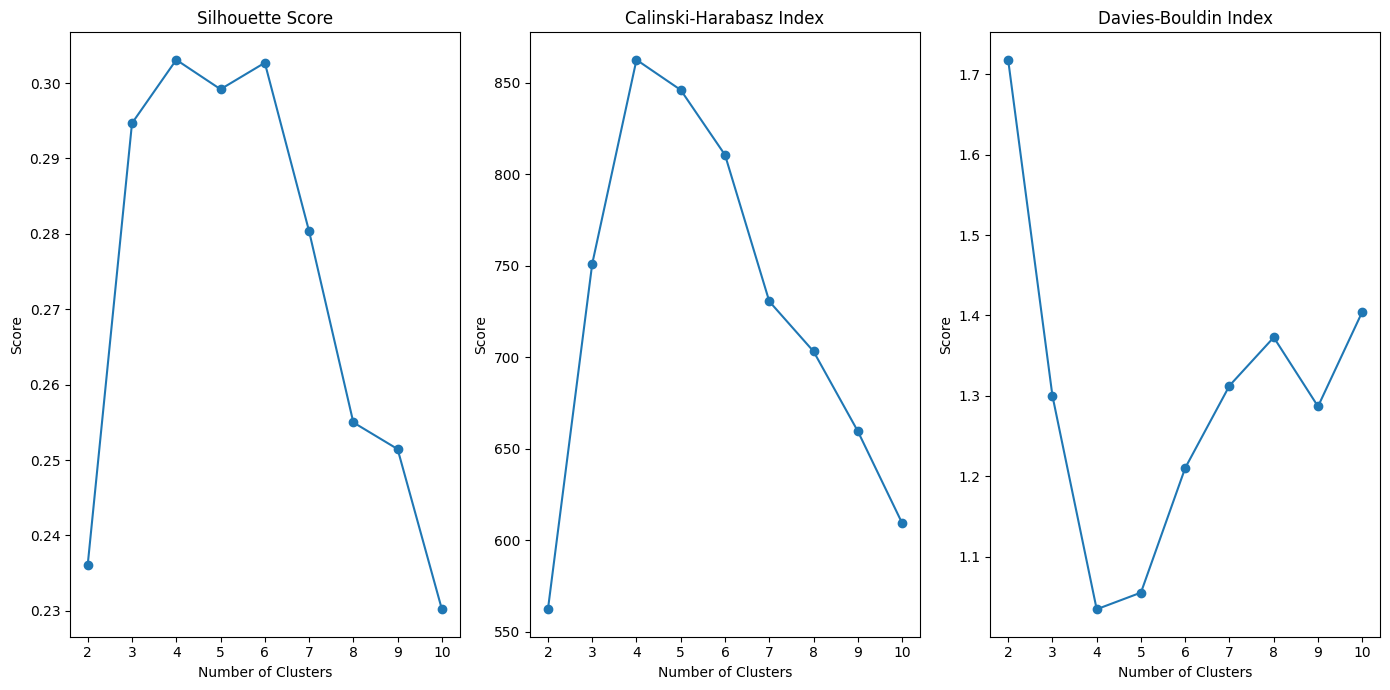

In [198]:
# Iterate over the range of clusters
for n_clusters in cluster_range:
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(X, cluster_labels)
    calinski_harabasz_avg = calinski_harabasz_score(X, cluster_labels)
    davies_bouldin_avg = davies_bouldin_score(X, cluster_labels)
    
    # Append the metrics to the lists
    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(calinski_harabasz_avg)
    davies_bouldin_scores.append(davies_bouldin_avg)

# Plot the evaluation metrics
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(1, 3, 2)
plt.plot(cluster_range, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.subplot(1, 3, 3)
plt.plot(cluster_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')

plt.tight_layout()
plt.show()


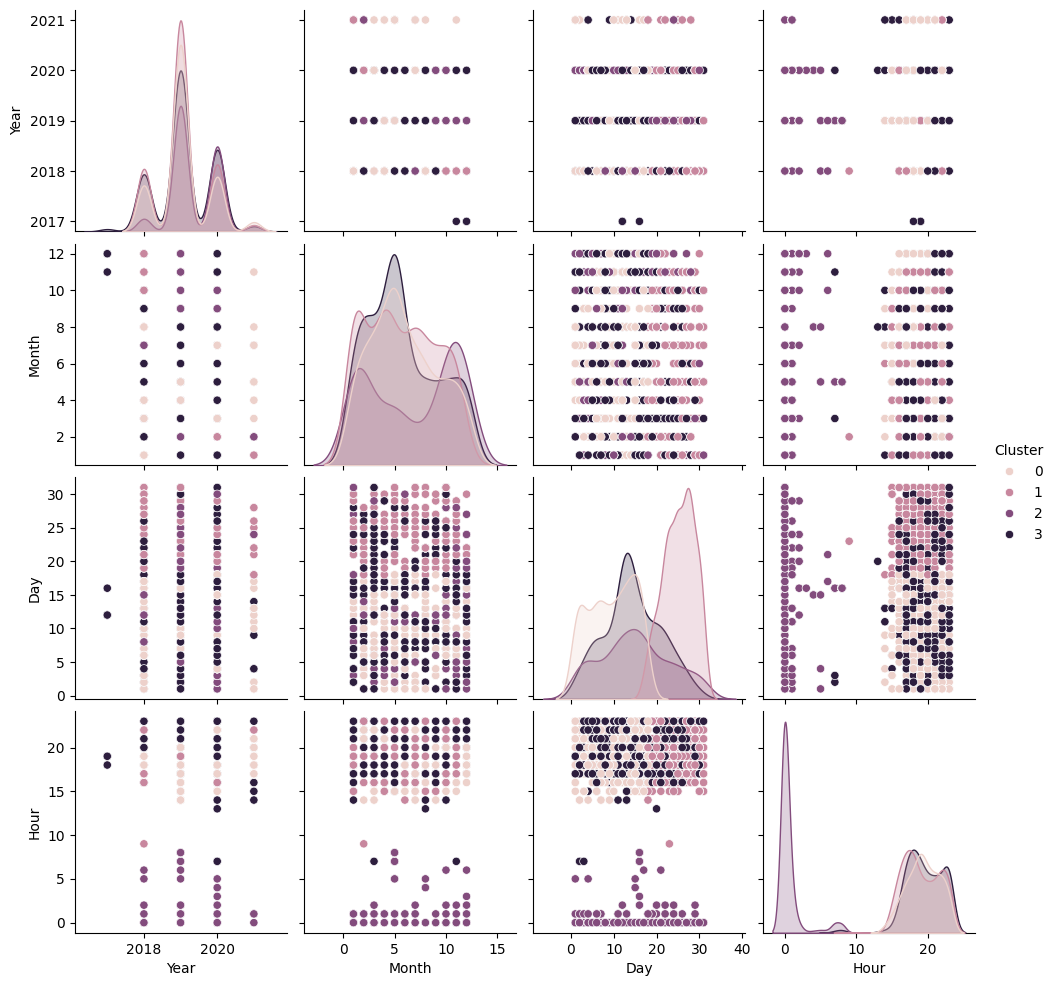

In [201]:
# Select the optimal number of clusters (based on the highest silhouette score)
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Train the final KMeans model with the optimal number of clusters
final_kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
final_cluster_labels = final_kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
data['Cluster'] = final_cluster_labels

# Visualize the clusters using a pairplot
sns.pairplot(data, hue='Cluster', vars=['Year', 'Month', 'Day', 'Hour'])
plt.show()


In [203]:
print("Best Silhouette Score:", max(silhouette_scores))
print("Best Calinski-Harabasz Score:", max(calinski_harabasz_scores))
print("Best Davies-Bouldin Score:", min(davies_bouldin_scores))

Best Silhouette Score: 0.30308068606840577
Best Calinski-Harabasz Score: 862.5050762802773
Best Davies-Bouldin Score: 1.0345384533815492


In [205]:
# Calculate the silhouette score for the final clustering
silhouette_avg = silhouette_score(X, final_cluster_labels)
print("Silhouette Score for the final clustering:", silhouette_avg)

Silhouette Score for the final clustering: 0.3082795554221044


In [ ]:
from sklearn.metrics import silhouette_score


# Create a new sample instance for testing
new_instance = pd.DataFrame({
    'SchoolDepartment': [1],
    'Professors': [5],
    'Hour': [10],
    'Communication Planning': [0],
    'Data Collection Tools': [0],
    'Event': [0],
    'Executive-Level Documentation': [0],
    'Graphic Design': [0],
    'Internal and External Communication': [0],
    'Issue and Risk Management': [0],
    'Marketing (Posters, Brochures, Reports)': [0],
    'News Writing and Editing': [0],
    'None': [0],
    'Open Houses': [0],
    'Printed Material (Posters, Brochures, Reports)': [0],
    'Public Relations': [0],
    'Social Media Strategy': [0],
    'Strategic Planning and Project Management': [0],
    'Strategy': [0],
    'Technical Writing': [0],
    'Video Editing and Production': [0],
    'Website Programming': [1],
    'Year': [2020],
    'Month': [5],
    'Day': [15]
})

# Predict the cluster for the new instance
new_instance_cluster = final_kmeans.predict(new_instance)
print("Cluster for the new instance:", new_instance_cluster[0])

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- 0
- 1
- 10
- 100
- 101
- ...


In [204]:
# Save the final model
import joblib
joblib.dump(final_kmeans, 'final_kmeans_model0.1.0.pkl')

['final_kmeans_model0.1.0.pkl']

# Model Deployment
Export the final model, create inference functions, and prepare model artifacts for deployment as an API endpoint.

In [ ]:
# Model Deployment

# Export the final model, create inference functions, and prepare model artifacts for deployment as an API endpoint.

# Save the final model
import joblib
joblib.dump(final_kmeans, 'final_kmeans_model.pkl')

# Create inference function
def recommend_resources(input_data):
    """
    Function to recommend academic resources based on input data.
    
    Parameters:
    input_data (pd.DataFrame): DataFrame containing the input features for recommendation.
    
    Returns:
    pd.DataFrame: DataFrame containing the recommended resources.
    """
    # Load the trained model
    model = joblib.load('final_kmeans_model.pkl')
    
    # Predict the cluster for the input data
    cluster_label = model.predict(input_data)
    
    # Filter the original dataset to get resources from the same cluster
    recommended_resources = data[data['Cluster'] == cluster_label[0]]
    
    return recommended_resources

# Example usage of the inference function
# Prepare a sample input data
sample_input = pd.DataFrame({
    'SchoolDepartment': [1],
    'ProjectTitle': [2],
    'Email': [3],
    'RequiredSkill': [4],
    'Professors': [5],
    'GainedSkill': [6],
    'Year': [2019],
    'Month': [4],
    'Day': [16],
    'Hour': [7]
})

# Get recommendations
recommendations = recommend_resources(sample_input)
recommendations.head()

# Prepare model artifacts for deployment
# Save the inference function as a script
with open('inference_function.py', 'w') as f:
    f.write("""
import joblib
import pandas as pd

def recommend_resources(input_data):
    \"\"\"
    Function to recommend academic resources based on input data.
    
    Parameters:
    input_data (pd.DataFrame): DataFrame containing the input features for recommendation.
    
    Returns:
    pd.DataFrame: DataFrame containing the recommended resources.
    \"\"\"
    # Load the trained model
    model = joblib.load('final_kmeans_model.pkl')
    
    # Predict the cluster for the input data
    cluster_label = model.predict(input_data)
    
    # Load the original dataset
    data = pd.read_csv('MLOPS_ACADIMIC__DATASET.CSV')
    
    # Filter the original dataset to get resources from the same cluster
    recommended_resources = data[data['Cluster'] == cluster_label[0]]
    
    return recommended_resources
""")

# The model and inference function are now ready for deployment as an API endpoint.